### Name : Aakanksha Kavishwar Bhadsale.
### Roll No : DS24MS04
### Project :  Yulu Bike Sharing Demand Prediction

### Problem Statement

 The program aims to predict the number of bikes rented (Rented Bike Count) on a given day based on various environmental and seasonal factors using a dataset called "YuluBikeData.csv".

In [ ]:
#Add necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
# Import the dataset

df = pd.read_csv('/content/YuluBikeData.csv', encoding='unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#Shape of the dataset
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Dislpay column name
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Check the null values
df.isnull().sum()

,0
Date,0
Rented Bike Count,0
Hour,0
Temperature(°C),0
Humidity(%),0
Wind speed (m/s),0
Visibility (10m),0
Dew point temperature(°C),0
Solar Radiation (MJ/m2),0
Rainfall(mm),0


**There is no null values in given dataset**

In [ ]:
#Check duplicate record
df.duplicated().sum()

np.int64(0)

**No duplicate records are present**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
#Count of uniques values present in the columns
df.nunique()

,0
Date,365
Rented Bike Count,2166
Hour,24
Temperature(°C),546
Humidity(%),90
Wind speed (m/s),65
Visibility (10m),1789
Dew point temperature(°C),556
Solar Radiation (MJ/m2),345
Rainfall(mm),61


In [ ]:
#Convert 'Date' column to datetime object

df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3456 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [ ]:
#Add new column
df['Month'] = df['Date'].dt.month

In [ ]:
#Check cloumns have different values or not
df['Snowfall (cm)'].value_counts()

,count
Snowfall (cm),
0.0,8317
0.3,42
1.0,39
0.5,34
0.9,34
0.7,31
0.8,22
2.0,22
0.4,21


In [ ]:
df['Wind speed (m/s)'].value_counts()

,count
Wind speed (m/s),
1.1,420
1.2,403
0.9,388
1.0,388
0.8,385
...,...
7.2,1
6.1,1
7.3,1


In [ ]:
#Select only numeric datatype
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

In [ ]:
# Display the correlation matrix
correlation_matrix

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,1.323543e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,4.921436e-17
Temperature(°C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,-6.226287e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,-4.700400e-02
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,1.884229e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,2.705257e-02
Dew point temperature(°C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,-6.725069e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-2.030977e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-4.721603e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,2.124676e-02


## Exploratory data analysis

####**1. Univariate analysis**

Univariate analysis is the process of examining one variable at a time to understand its distribution, patterns, and characteristics.





In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1.0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1.0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1.0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1.0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1.0


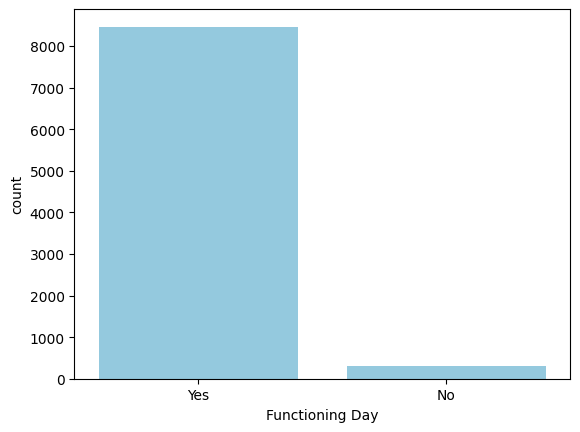

In [ ]:
sns.countplot(data = df,x = 'Functioning Day',color='skyblue')
plt.show()

####2.Bivariate analysis

Bivariate analysis is a type of analysis that examines the relationship between two variables. The goal is to see whether and how the variables are related.

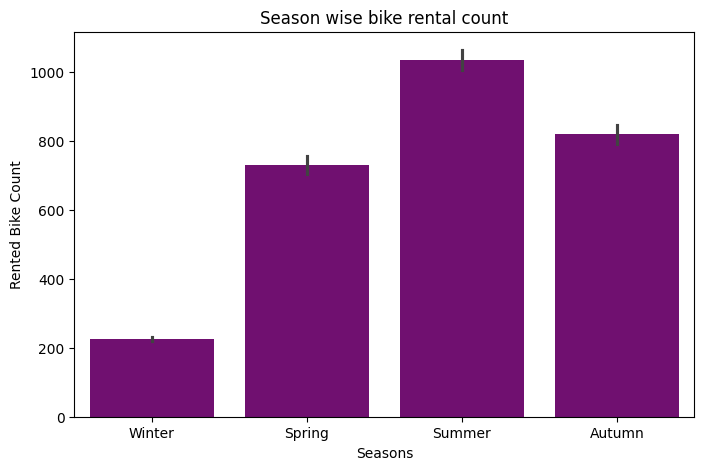

In [ ]:
plt.figure(figsize = (8,5))
sns.barplot(x = df['Seasons'],y=df['Rented Bike Count'],color = 'purple')
plt.xlabel('Seasons')
plt.ylabel('Rented Bike Count')
plt.title('Season wise bike rental count')
plt.show()


**The graph shows that bike rentals are highest in the summer months and lowest in the winter months , indicating a seasonal variation in demand.**

In [ ]:
bike_rental_counts_holidya_wise = df.groupby('Holiday')['Rented Bike Count'].sum().sort_values(ascending = True)
bike_rental_counts_holidya_wise

,Rented Bike Count
Holiday,
Holiday,215895
No Holiday,5956419


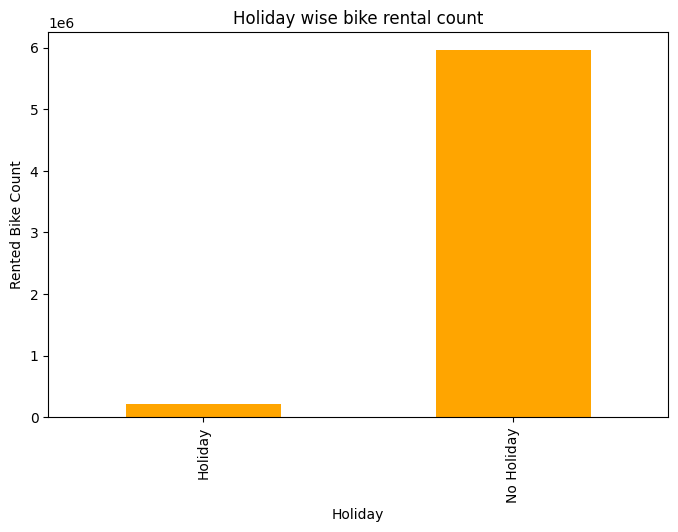

In [ ]:
plt.figure(figsize = (8,5))
bike_rental_counts_holidya_wise.plot(kind = 'bar',color = 'orange')
plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Holiday wise bike rental count')
plt.show()

**he graph reveals that bike rentals are significantly higher on non-holiday days (5,956,419 rentals) compared to holiday days (215,895 rentals), indicating that demand is much greater when there are no holidays.**

In [ ]:
#Month wise rental count

month_wise_rental_count = df.groupby('Month')['Rented Bike Count'].sum()
month_wise_rental_count

,Rented Bike Count
Month,
1.0,201300
2.0,165973
3.0,192256
4.0,202423
5.0,193881
6.0,181136
7.0,229833
8.0,210121
9.0,160720


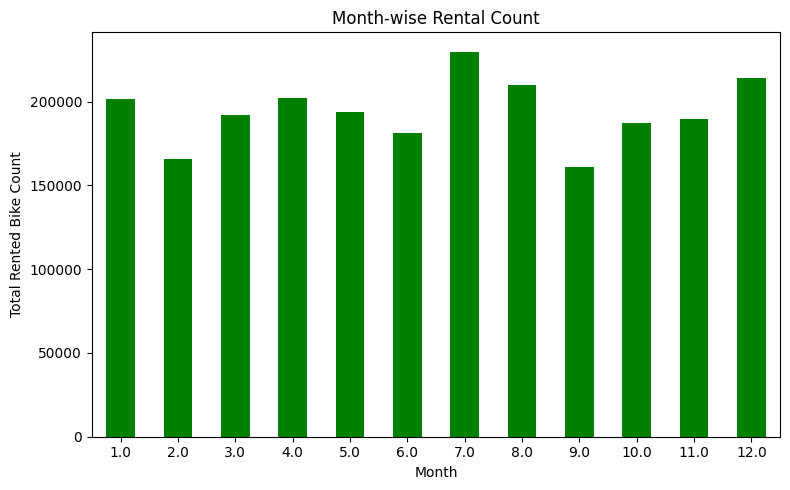

In [ ]:
plt.figure(figsize = (8,5))
month_wise_rental_count.plot(kind='bar', color='green')
plt.title('Month-wise Rental Count')
plt.xlabel('Month')
plt.ylabel('Total Rented Bike Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**The graph shows that bike rentals are highest in the summer months (July and August) and lowest in the winter months (January and February), indicating a seasonal variation in demand.**

####3.Multivariate analysis

Multivariate analysis is a technique used to understand relationships between three or more variables at the same time.

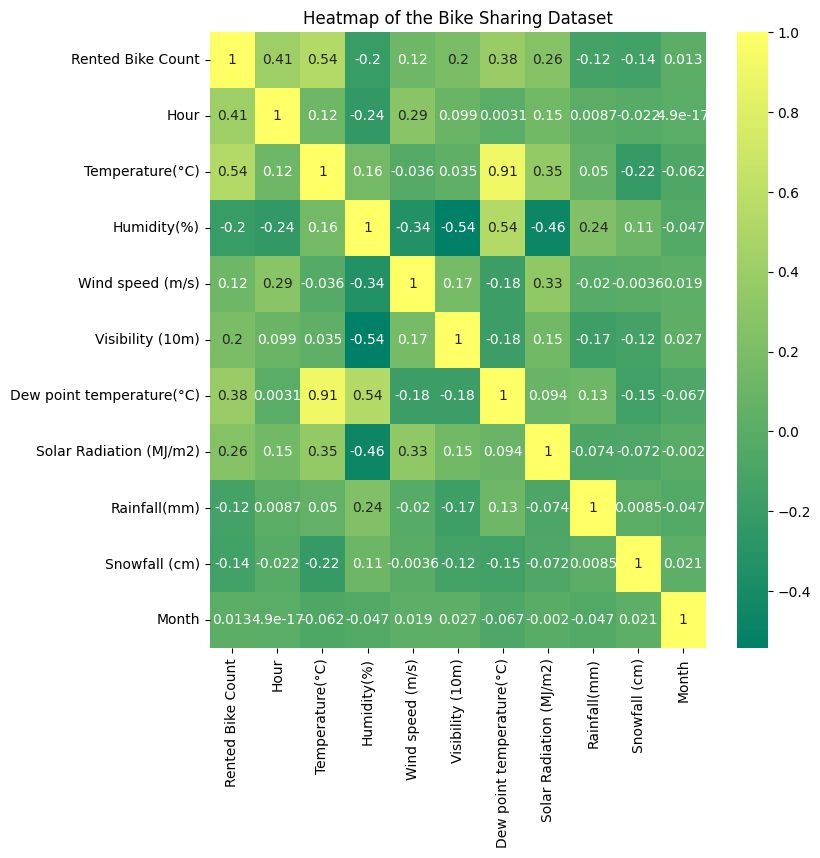

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix,annot=True,cmap='summer')
plt.title("Heatmap of the Bike Sharing Dataset")
plt.show()

**Dew point temperature(°C) is highly corelated to Temperature(°C)**

###Outliers

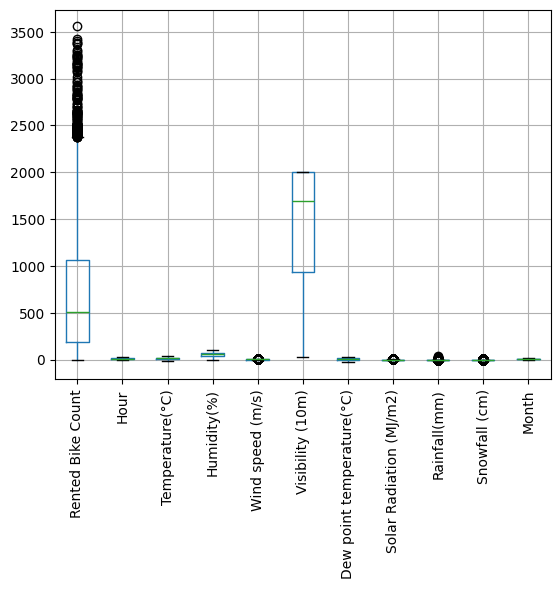

In [ ]:
boxplot=numeric_df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.shape

(8760, 15)

In [ ]:
df['Rented Bike Count'].quantile(0.95)

np.float64(2043.0)

In [ ]:
# Removing outliers
# df = df[df['Rented Bike Count'] < df['Rented Bike Count'].quantile(0.95)]

In [ ]:
# Removing outliers
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
# Q1 = df['Rented Bike Count'].quantile(0.25)
# Q3 = df['Rented Bike Count'].quantile(0.75)

# # Calculate IQR
# IQR = Q3 - Q1

# # Define the bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers
# data_cleaned = df[(df['Rented Bike Count'] >= lower_bound) & (df['Rented Bike Count'] <= upper_bound)]

# # Display the cleaned data
# print(f"Original data shape: {df.shape}")
# print(f"Cleaned data shape: {data_cleaned.shape}")


###One hot encoding

In [ ]:
dum_df = pd.get_dummies(df,columns = ['Seasons','Holiday','Functioning Day'])

In [ ]:
dum_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1.0,False,False,False,True,False,True,False,True
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1.0,False,False,False,True,False,True,False,True
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1.0,False,False,False,True,False,True,False,True
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1.0,False,False,False,True,False,True,False,True
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1.0,False,False,False,True,False,True,False,True


In [ ]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3456 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Month                      3456 non-null   float64       
 12  Season

###Model preparation

In [ ]:
x = dum_df.drop(['Rented Bike Count','Date','Month'], axis =1).values # Independent variable
y = dum_df['Rented Bike Count'].values # dependent variable

###Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2025)

In [ ]:
x_train

array([[6, 9.6, 84, ..., True, False, True],
       [16, 34.1, 52, ..., True, False, True],
       [4, 12.1, 51, ..., True, False, True],
       ...,
       [3, 24.5, 97, ..., True, False, True],
       [11, -6.1, 38, ..., True, False, True],
       [22, 24.3, 71, ..., True, False, True]], dtype=object)

###Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train

array([[-0.79432889, -0.2708725 ,  1.2749594 , ...,  0.23153455,
        -0.18738039,  0.18738039],
       [ 0.64448739,  1.78330376, -0.30012927, ...,  0.23153455,
        -0.18738039,  0.18738039],
       [-1.08209214, -0.06126268, -0.34935079, ...,  0.23153455,
        -0.18738039,  0.18738039],
       ...,
       [-1.22597377,  0.97840205,  1.91483917, ...,  0.23153455,
        -0.18738039,  0.18738039],
       [-0.07492075, -1.58722218, -0.98923056, ...,  0.23153455,
        -0.18738039,  0.18738039],
       [ 1.50777716,  0.96163326,  0.63507963, ...,  0.23153455,
        -0.18738039,  0.18738039]])

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(x_test)
lr_pred

array([ 769.9041539 , 1034.92995123,  782.95629986, ..., 1148.43104406,
        782.70936227,  -10.3473685 ])

####Predicting the Score

In [ ]:
print('Training Score',lr.score(x_train,y_train))
print('Testing Score',lr.score(x_test,y_test))

Training Score 0.5541863592263521
Testing Score 0.5403243474756414


###Visualise

<Axes: >

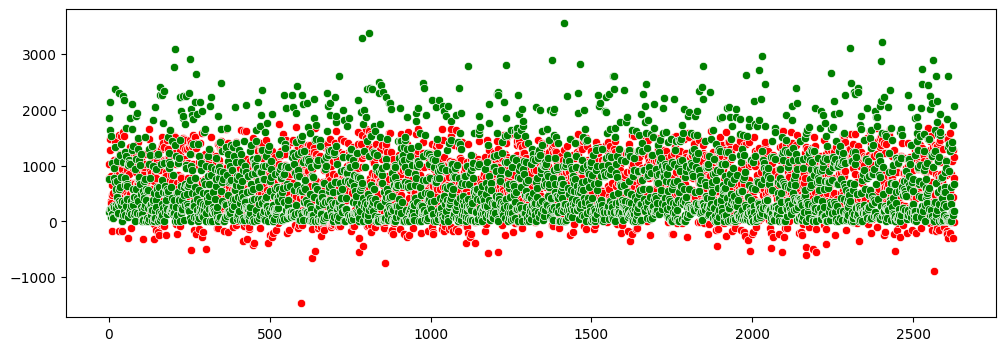

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(lr_pred, color = 'r')
sns.scatterplot(y_test, color = 'g')

####Evaluation Metrics

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, lr_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, lr_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 190759.1055628774
RMSE : 436.75978015709893
R2 Linear regression : 54.03243474756414


#### Difference

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : lr_pred.astype(int), "Difference" : abs(y_test - lr_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
286,928,1115,187.115599
72,1278,1193,84.005139
1065,1456,1048,407.615162
1900,1853,1520,332.895028
1459,2313,1216,1096.461633
1836,683,738,55.146937
966,614,983,369.394414
19,709,1449,740.352314
793,1995,535,1459.346002
67,211,499,288.780889


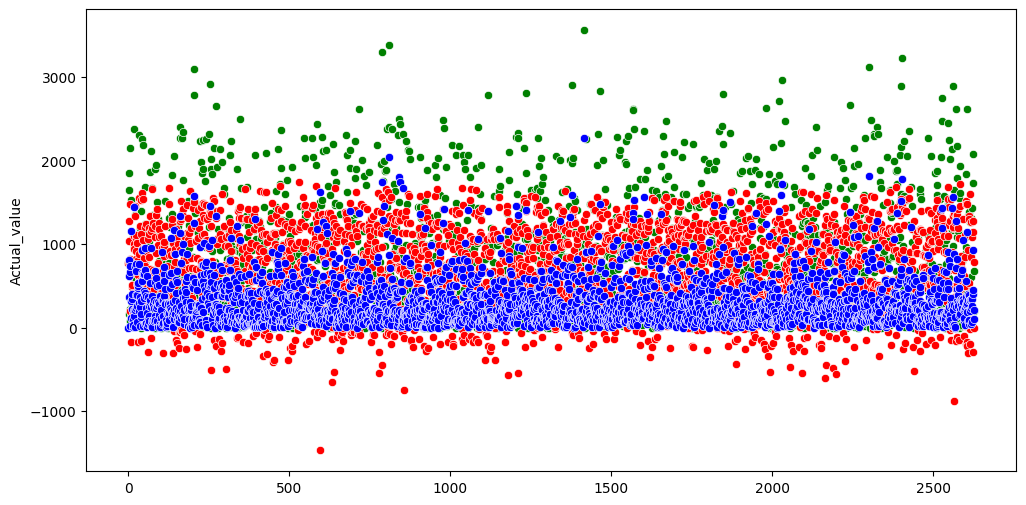

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(diff['Actual_value'], color = 'g')
sns.scatterplot(diff['Predicted_Value'], color = 'r')
sns.scatterplot(diff['Difference'], color = 'b')
plt.show()

####Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

print("Training: ", cross_val_score(lr, x_train, y_train, cv = 5).mean())
print("Testing: ", cross_val_score(lr, x_test, y_test, cv = 5).mean())

Training:  0.5511836075526746
Testing:  0.5344711423148589


**As we see model are perform well in both train and test dataset but, score are low means performance of this ' Linear Regression ' model is low for this dataset**

## Support Vector Machine (SVR)

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='linear')
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
svr_pred = svr.predict(x_test)
svr_pred

array([664.30505262, 924.08404781, 738.10041272, ..., 904.9083208 ,
       735.34123813,  75.47502964])

####Predicting the Score

In [ ]:
print('Training Score',svr.score(x_train,y_train))
print('Testing Score',svr.score(x_test,y_test))

Training Score 0.5105630104524324
Testing Score 0.4994711433039908


####Evaluation Metrics

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, svr_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test,svr_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 207712.6262559246
RMSE : 455.75500683582686
R2 Linear regression : 49.94711433039908


#### Difference

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : svr_pred.astype(int), "Difference" : abs(y_test - svr_pred)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
371,196,-80,276.577799
622,1089,568,520.749133
2205,198,449,251.876082
675,79,119,40.324488
1039,2066,1162,903.454898
2567,1258,1136,121.776814
576,93,405,312.864284
653,278,453,175.061829
1017,0,339,339.452594
228,387,389,2.300624


####Cross Validation Score

In [ ]:
print("Training: ", cross_val_score(svr, x_train, y_train, cv = 5).mean())
print("Testing: ", cross_val_score(svr, x_test, y_test, cv = 5).mean())

Training:  0.5053327051492768
Testing:  0.4698150079075731


**As we see model are perform well in both train and test dataset but, score are low means performance of this ' Support Vector Machine (SVR) ' model is low for this dataset**

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

####Predicting the Score

In [ ]:
print('Training Score',dt.score(x_train,y_train))
print('Testing Score',dt.score(x_test,y_test))

Training Score 1.0
Testing Score 0.7359304914641787


####Evaluation Metrics

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_dt)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test,y_pred_dt)
print("R2 Linear regression :" ,r2*100)

MSE : 109585.23249619482
RMSE : 331.03660295531495
R2 Linear regression : 73.59304914641787


#### Difference

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_dt.astype(int), "Difference" : abs(y_test - y_pred_dt)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
383,230,144,86.0
640,0,0,0.0
1019,1488,1550,62.0
2436,1021,1070,49.0
2495,176,124,52.0
699,1217,770,447.0
1914,1028,1641,613.0
581,1422,1184,238.0
707,1891,2365,474.0
606,358,375,17.0


####Cross Validation Score

In [ ]:
print("Training: ", cross_val_score(dt, x_train, y_train, cv = 5).mean())
print("Testing: ", cross_val_score(dt, x_test, y_test, cv = 5).mean())

Training:  0.7458087852260102
Testing:  0.6925736790228938


**As we see, the models perform well on the training dataset, but they tend to overfit**

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

####Predicting the Score

In [ ]:
print('Training Score',rf.score(x_train,y_train))
print('Testing Score',rf.score(x_test,y_test))

Training Score 0.9824894308644219
Testing Score 0.8584743144501442


####Evaluation Metrics

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test,y_pred_rf)
print("R2 Linear regression :" ,r2*100)

MSE : 58731.2228555175
RMSE : 242.345255483819
R2 Linear regression : 85.84743144501442


#### Difference

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_rf.astype(int), "Difference" : abs(y_test - y_pred_rf)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
1124,247,203,43.77
1192,339,183,155.24
2558,1167,1056,110.90
586,2431,2231,199.65
1365,812,431,380.42
1828,1557,2459,902.66
973,148,258,110.39
426,253,417,164.39
405,1276,2003,727.27
2222,263,321,58.66


####Cross Validation Score

In [ ]:
print("Training: ", cross_val_score(rf, x_train, y_train, cv = 5).mean())
print("Testing: ", cross_val_score(rf, x_test, y_test, cv = 5).mean())

Training:  0.8722958525920896
Testing:  0.8392851925194386


**As we see model are perform well in both train and test dataset and also performance of  ' Random Forest ' model is good.**

## K Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

####Predicting the Score

In [ ]:
print('Training Score',knn.score(x_train,y_train))
print('Testing Score',knn.score(x_test,y_test))

Training Score 0.8589780781803503
Testing Score 0.7661566686349277


####Evaluation Metrics

In [ ]:
# Importing Evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred_knn)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test,y_pred_knn)
print("R2 Linear regression :" ,r2*100)

MSE : 97041.78258751903
RMSE : 311.51530072777973
R2 Linear regression : 76.61566686349278


#### Difference

In [ ]:
diff = pd.DataFrame({"Actual_value" : y_test, "Predicted_Value" : y_pred_knn.astype(int), "Difference" : abs(y_test - y_pred_knn)})
diff.sample(10)

,Actual_value,Predicted_Value,Difference
1468,306,1378,1072.0
1296,555,360,194.4
300,289,305,16.2
255,0,0,0.0
2068,266,180,86.0
883,212,231,19.8
314,16,75,59.6
1402,484,533,49.2
1919,1241,1509,268.6
1363,1656,1042,613.2


####Cross Validation Score

In [ ]:
print("Training: ", cross_val_score(knn, x_train, y_train, cv = 5).mean())
print("Testing: ", cross_val_score(knn, x_test, y_test, cv = 5).mean())

Training:  0.7732007080127039
Testing:  0.6975402593562073


As we see model are perform well in both train and test dataset and also performance of  'K Nearest Neighbor (KNN) ' model is good.

In [ ]:
over_all_score = pd.DataFrame({
    'Linear Regression' : (lr.score(x_train,y_train),lr.score(x_test,y_test)),
    'Support Vector Machine (SVR)': (svr.score(x_train,y_train),svr.score(x_test,y_test)),
    'Decision Tree Regressor' : (dt.score(x_train,y_train),dt.score(x_test,y_test)),
    'Random Forest' : (rf.score(x_train,y_train),rf.score(x_test,y_test)),
    'K Nearest Neighbor (KNN)' : (knn.score(x_train,y_train),knn.score(x_test,y_test))
})
over_all_score.T.rename(columns={0:'Training Score',1:'Testing Score'})

,Training Score,Testing Score
Linear Regression,0.554186,0.540324
Support Vector Machine (SVR),0.510563,0.499471
Decision Tree Regressor,1.000000,0.735930
Random Forest,0.982489,0.858474
K Nearest Neighbor (KNN),0.858978,0.766157


**Random Forest is the most effective model for this dataset, while Linear Regression and SVR provide moderate performance. Decision Tree shows signs of overfitting, and KNN is a solid alternative but not as strong as Random Forest.**